# 07.03 - Seaborn

**Autor:** Miguel Angel Vazquez Varela  
**Nivel:** Intermedio  
**Tiempo estimado:** 30 min

---

## Que aprenderemos?

- Graficos estadisticos con seaborn
- Distribucion: histplot, kdeplot, boxplot
- Relaciones: scatterplot, regplot
- Categoricos: barplot, countplot
- Facetas y grids

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
sns.set_theme(style="whitegrid")
print(f"seaborn version: {sns.__version__}")

seaborn version: 0.13.2


---

## Datos de ejemplo

In [2]:
np.random.seed(42)
n = 500

trips = pd.DataFrame({
    "duration": np.concatenate([
        np.random.normal(18, 5, 350),   # Subscribers
        np.random.normal(28, 10, 150)   # Casual
    ]),
    "distance": np.concatenate([
        np.random.normal(4, 1.5, 350),
        np.random.normal(5, 2, 150)
    ]),
    "user_type": ["subscriber"]*350 + ["casual"]*150,
    "station": np.random.choice(["Sol", "Atocha", "Retiro", "Cibeles"], n),
    "hour": np.random.choice(range(6, 23), n)
})

# Asegurar valores positivos
trips["duration"] = trips["duration"].clip(lower=1)
trips["distance"] = trips["distance"].clip(lower=0.5)

trips.head()

,duration,distance,user_type,station,hour
0,20.483571,5.389266,subscriber,Retiro,12
1,17.308678,6.864125,subscriber,Cibeles,6
2,21.238443,1.902149,subscriber,Sol,17
3,25.615149,4.844454,subscriber,Cibeles,18
4,16.829233,3.024036,subscriber,Retiro,15


---

## 1. Distribucion: histplot

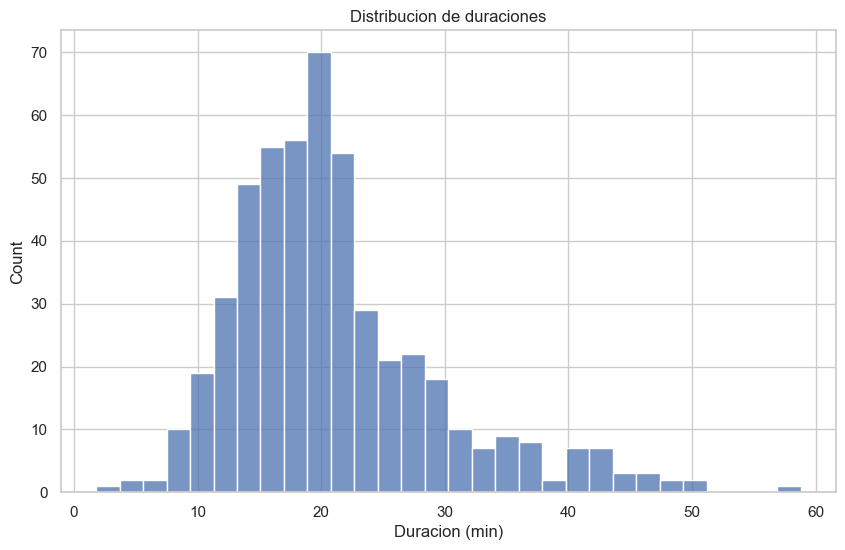

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(data=trips, x="duration", bins=30, ax=ax)

ax.set_title("Distribucion de duraciones")
ax.set_xlabel("Duracion (min)")
plt.show()

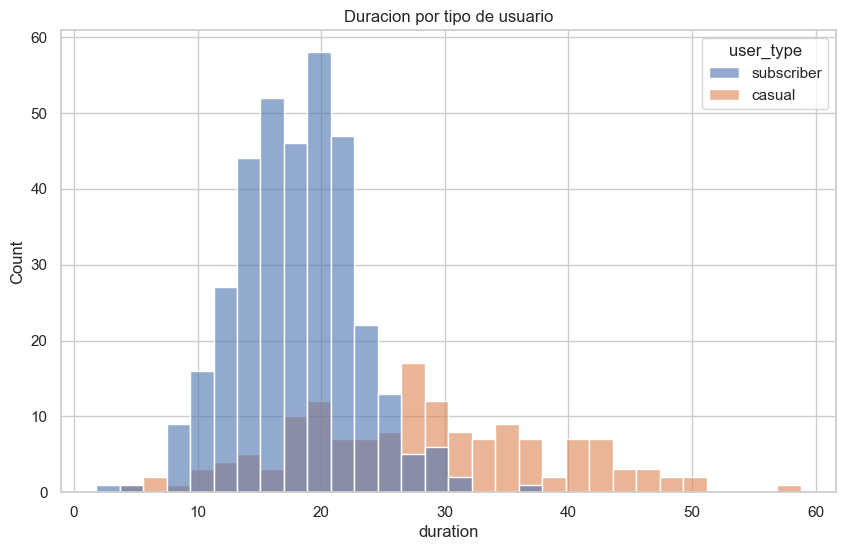

In [4]:
# Con hue (color por grupo)
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(
    data=trips, 
    x="duration", 
    hue="user_type",
    bins=30,
    alpha=0.6,
    ax=ax
)

ax.set_title("Duracion por tipo de usuario")
plt.show()

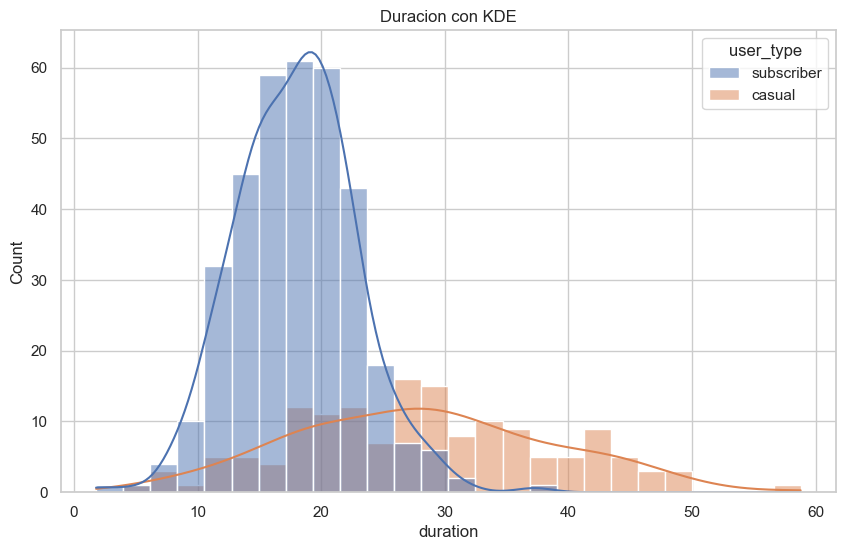

In [5]:
# Con KDE (curva de densidad)
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(
    data=trips, 
    x="duration", 
    hue="user_type",
    kde=True,
    ax=ax
)

ax.set_title("Duracion con KDE")
plt.show()

---

## 2. KDE plot

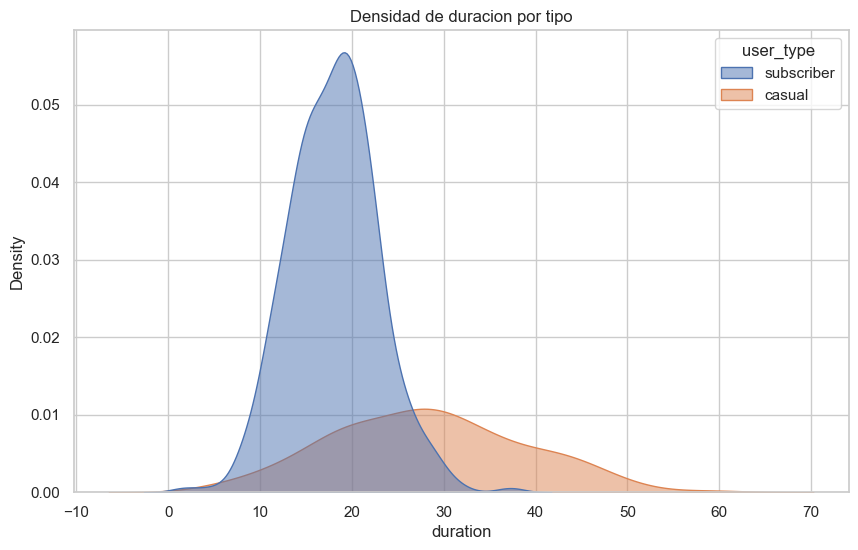

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.kdeplot(
    data=trips,
    x="duration",
    hue="user_type",
    fill=True,
    alpha=0.5,
    ax=ax
)

ax.set_title("Densidad de duracion por tipo")
plt.show()

---

## 3. Box plot y Violin plot

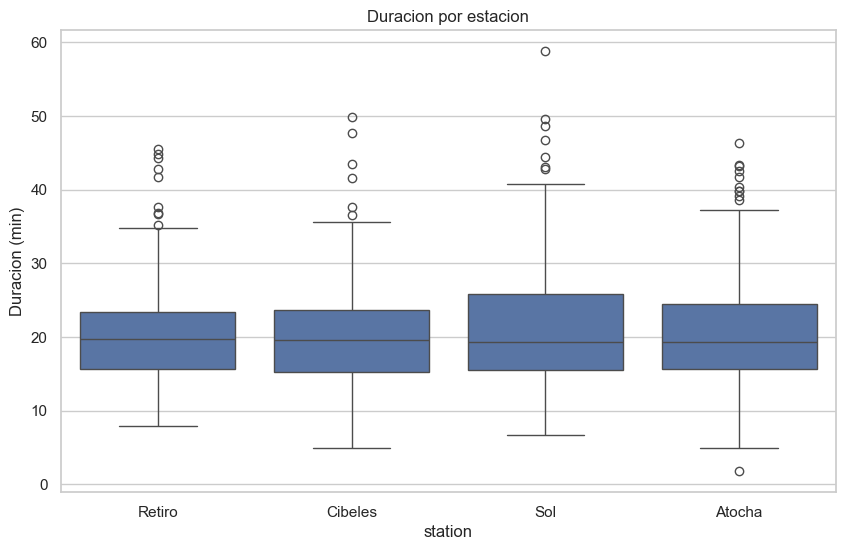

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(
    data=trips,
    x="station",
    y="duration",
    ax=ax
)

ax.set_title("Duracion por estacion")
ax.set_ylabel("Duracion (min)")
plt.show()

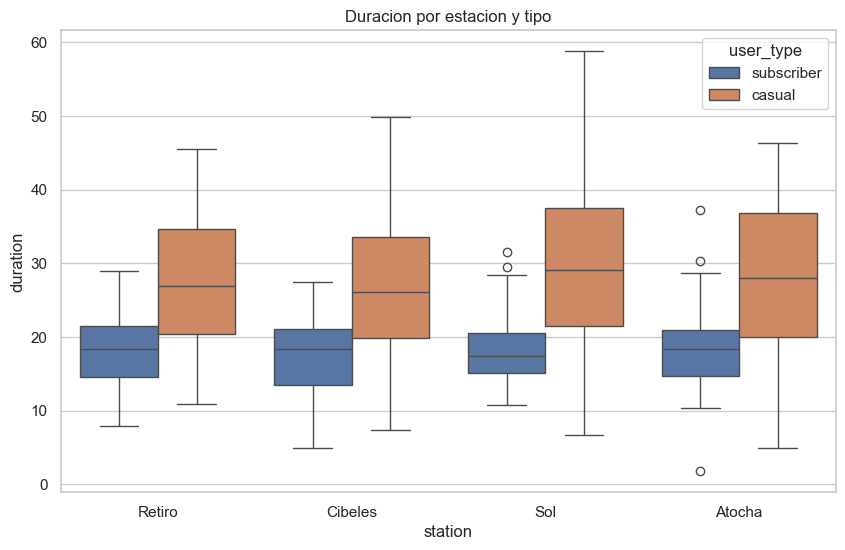

In [8]:
# Con hue
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(
    data=trips,
    x="station",
    y="duration",
    hue="user_type",
    ax=ax
)

ax.set_title("Duracion por estacion y tipo")
plt.show()

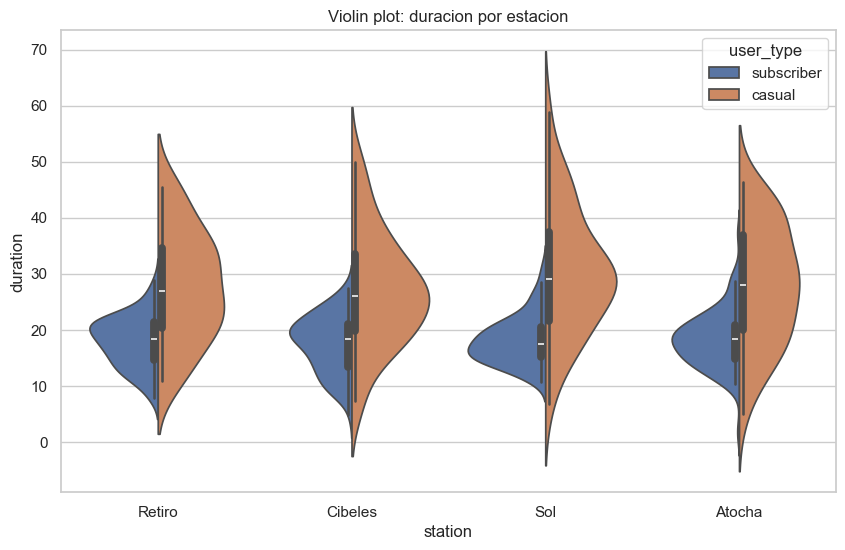

In [9]:
# Violin plot (muestra distribucion)
fig, ax = plt.subplots(figsize=(10, 6))

sns.violinplot(
    data=trips,
    x="station",
    y="duration",
    hue="user_type",
    split=True,
    ax=ax
)

ax.set_title("Violin plot: duracion por estacion")
plt.show()

---

## 4. Bar plot y Count plot

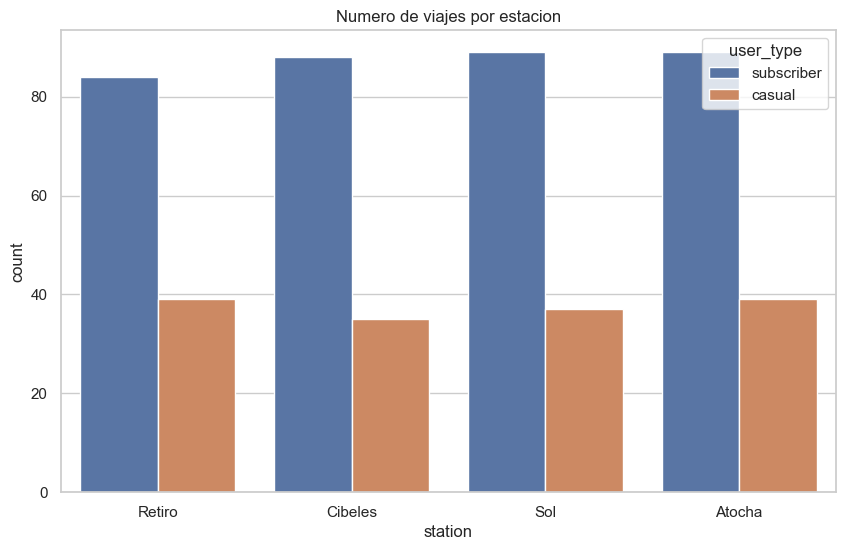

In [10]:
# countplot: conteo de categorias
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(
    data=trips,
    x="station",
    hue="user_type",
    ax=ax
)

ax.set_title("Numero de viajes por estacion")
plt.show()

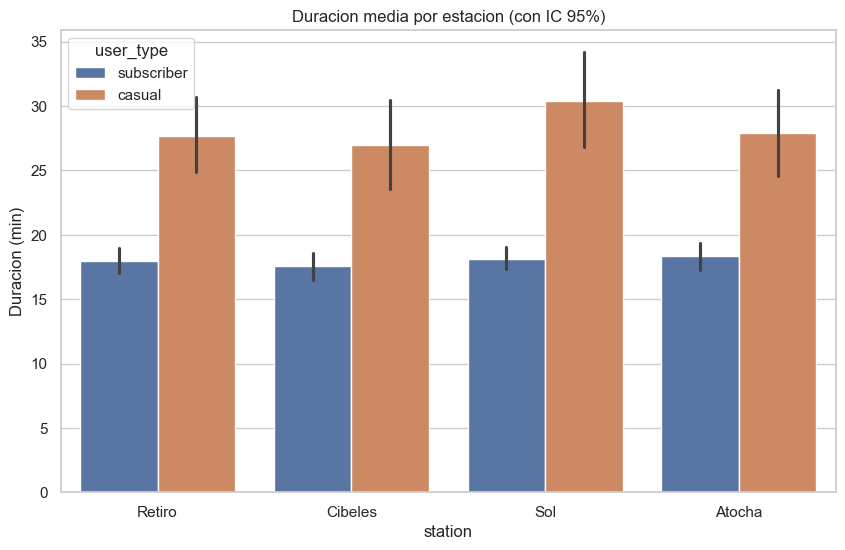

In [11]:
# barplot: muestra la MEDIA (con intervalo de confianza)
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(
    data=trips,
    x="station",
    y="duration",
    hue="user_type",
    ax=ax
)

ax.set_title("Duracion media por estacion (con IC 95%)")
ax.set_ylabel("Duracion (min)")
plt.show()

---

## 5. Scatter plot

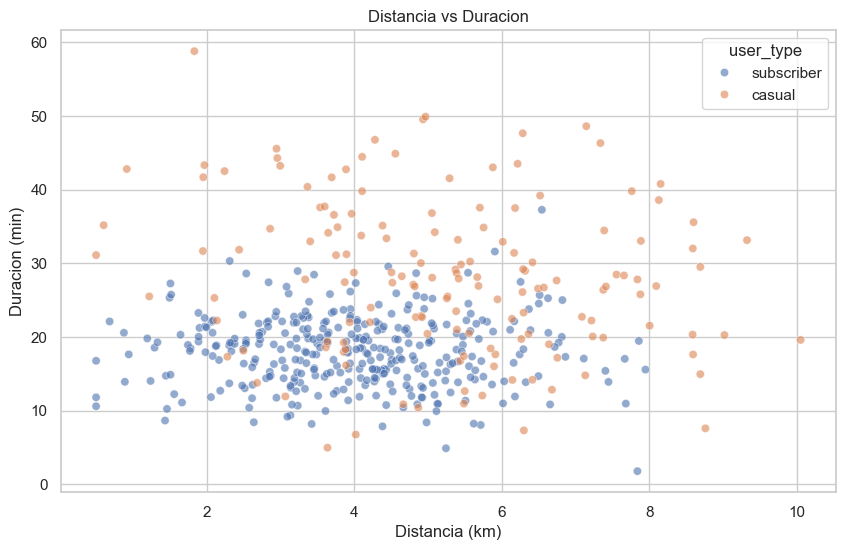

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(
    data=trips,
    x="distance",
    y="duration",
    hue="user_type",
    alpha=0.6,
    ax=ax
)

ax.set_title("Distancia vs Duracion")
ax.set_xlabel("Distancia (km)")
ax.set_ylabel("Duracion (min)")
plt.show()

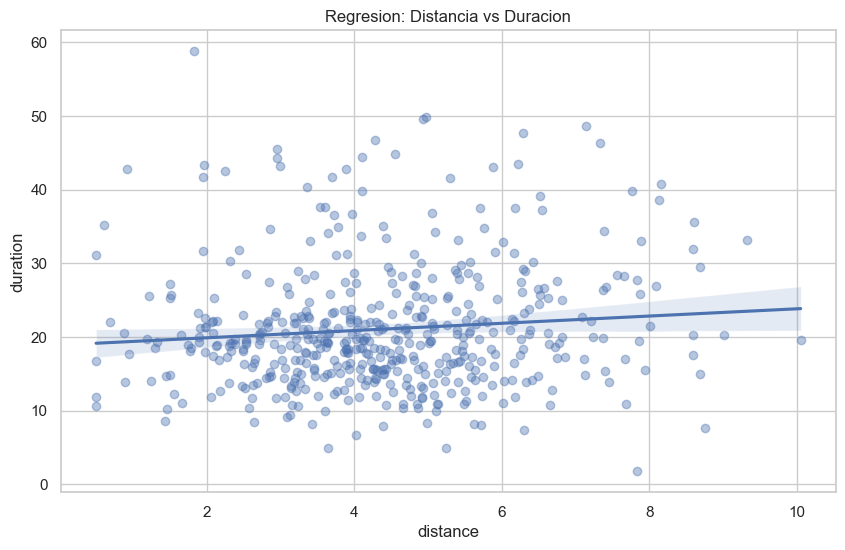

In [13]:
# regplot: con linea de regresion
fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(
    data=trips,
    x="distance",
    y="duration",
    scatter_kws={"alpha": 0.4},
    ax=ax
)

ax.set_title("Regresion: Distancia vs Duracion")
plt.show()

---

## 6. Heatmap

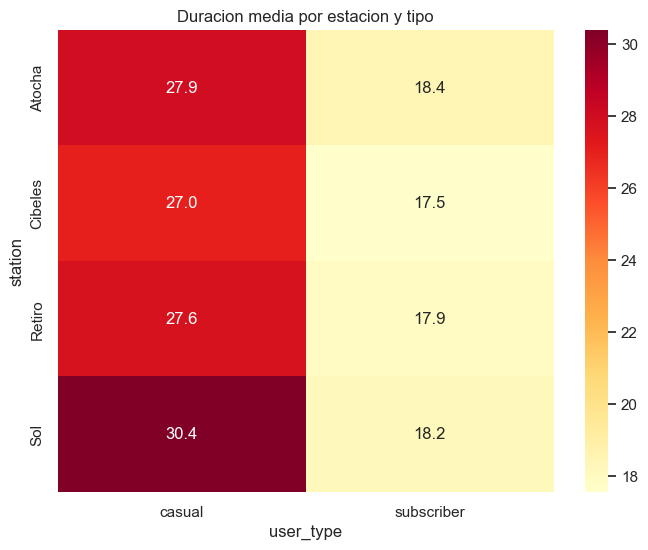

In [14]:
# Crear pivot table
pivot = trips.pivot_table(
    values="duration",
    index="station",
    columns="user_type",
    aggfunc="mean"
)

fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(
    pivot,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd",
    ax=ax
)

ax.set_title("Duracion media por estacion y tipo")
plt.show()

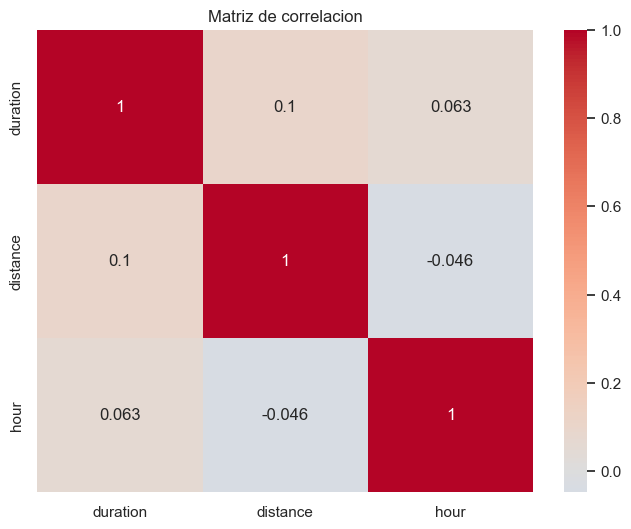

In [15]:
# Correlacion
corr = trips[["duration", "distance", "hour"]].corr()

fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    center=0,
    ax=ax
)

ax.set_title("Matriz de correlacion")
plt.show()

---

## 7. Pairplot

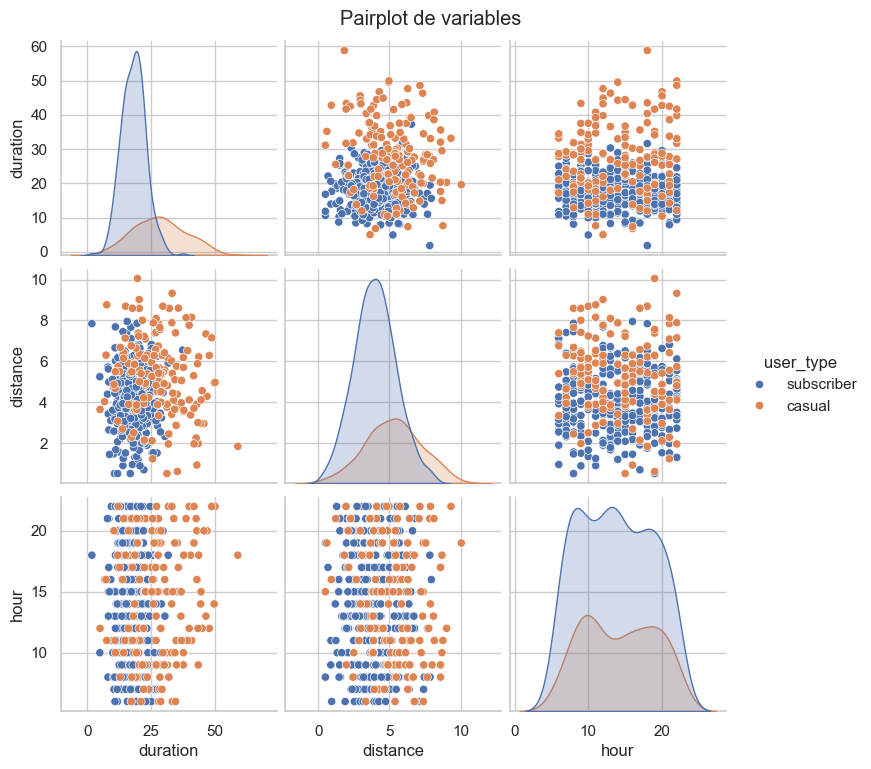

In [16]:
# Todas las combinaciones de variables
sns.pairplot(
    trips[["duration", "distance", "hour", "user_type"]],
    hue="user_type",
    height=2.5
)
plt.suptitle("Pairplot de variables", y=1.02)
plt.show()

---

## 8. FacetGrid

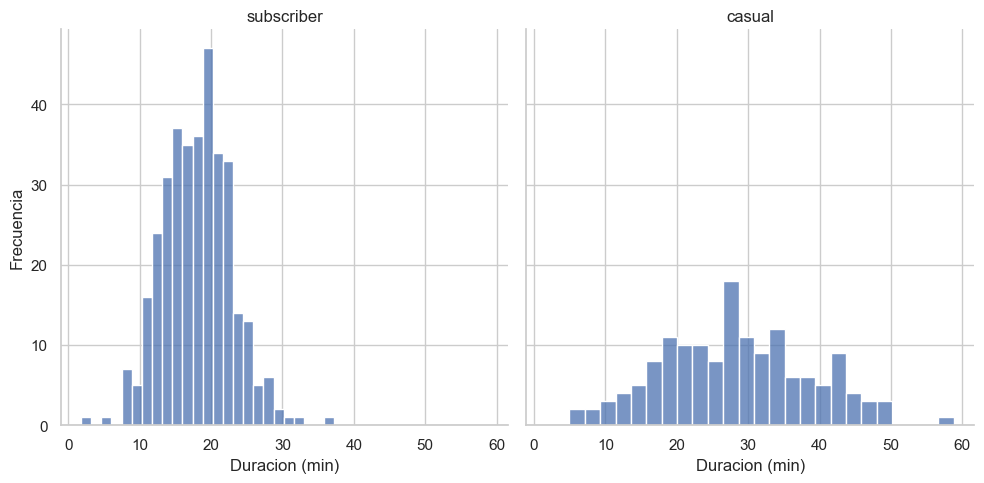

In [17]:
# Histogramas separados por categoria
g = sns.FacetGrid(trips, col="user_type", height=5)
g.map(sns.histplot, "duration", bins=25)
g.set_axis_labels("Duracion (min)", "Frecuencia")
g.set_titles("{col_name}")
plt.show()

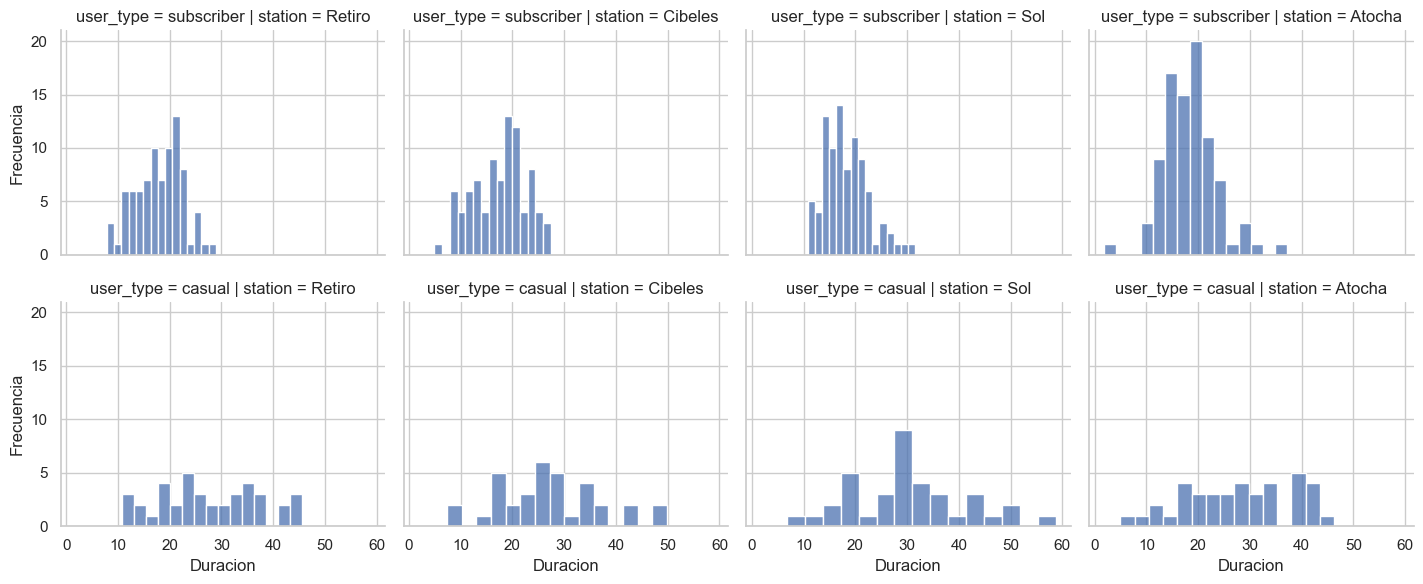

In [18]:
# Grid por fila Y columna
g = sns.FacetGrid(
    trips, 
    row="user_type", 
    col="station",
    height=3,
    aspect=1.2
)
g.map(sns.histplot, "duration", bins=15)
g.set_axis_labels("Duracion", "Frecuencia")
plt.show()

---

## 9. Catplot (graficos categoricos)

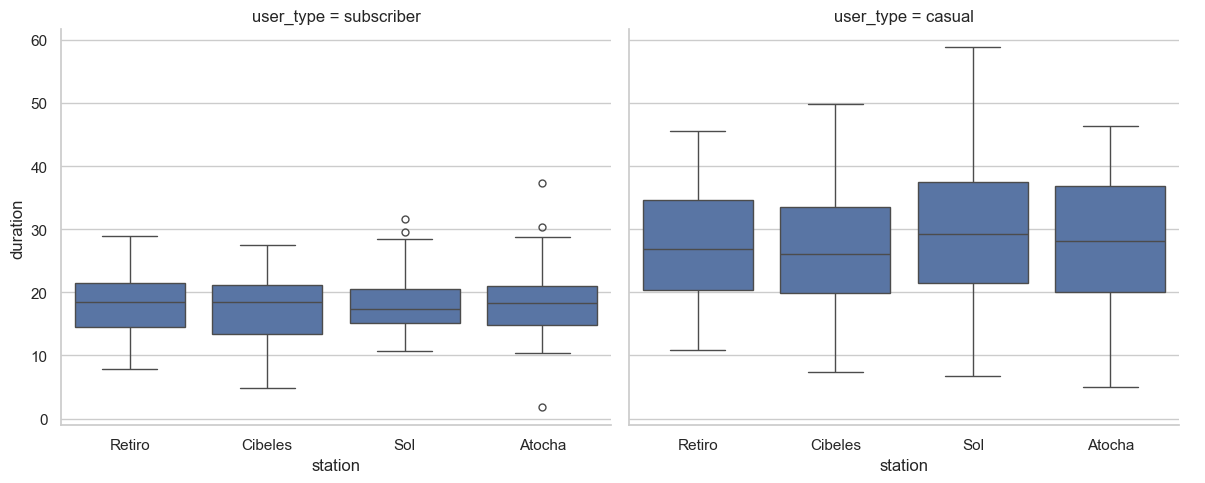

In [19]:
# Box plots facetados
sns.catplot(
    data=trips,
    x="station",
    y="duration",
    col="user_type",
    kind="box",
    height=5,
    aspect=1.2
)
plt.show()

---

## Resumen

| Tipo | Funcion |
|------|--------|
| Histograma | `sns.histplot()` |
| Densidad | `sns.kdeplot()` |
| Box plot | `sns.boxplot()` |
| Violin | `sns.violinplot()` |
| Barras | `sns.barplot()`, `sns.countplot()` |
| Scatter | `sns.scatterplot()`, `sns.regplot()` |
| Heatmap | `sns.heatmap()` |
| Pares | `sns.pairplot()` |
| Facetas | `sns.FacetGrid()`, `sns.catplot()` |

**Parametro clave:** `hue=` para colorear por categoria

---

**Anterior:** [07.02 - Pandas Plotting](07_02_pandas_plotting.ipynb)  
**Siguiente:** [08.01 - Series Temporales](../08_temporal_analytics/08_01_datetime_basics.ipynb)